In [1]:
import os
from keras.models import load_model

model = load_model('oral_VGG19.h5')

In [2]:
base_dir = "dataset_split/"
test_dir = os.path.join(base_dir, 'test')
classes = ['gigi calculus','gigi caries','gigi discoloration','gigi gingivitis', 'gigi hypodontia', 'gigi sehat',
           'lidah fissure', 'lidah geografis','lidah kanker', 'lidah leukoplakia','lidah putih', 'lidah sehat']

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'categorical',
    shuffle = False,
)

Found 906 images belonging to 12 classes.


In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')

testLab = test_generator.classes
pred = model.predict(test_generator)
y_pred = np.argmax(pred, axis=-1)
class_names = test_generator.class_indices

print(classification_report(y_pred, testLab, target_names=class_names))

57/57 [==============================] - 14s 147ms/step
                    precision    recall  f1-score   support

     gigi calculus       0.64      0.83      0.72       108
       gigi caries       0.92      0.95      0.94       130
gigi discoloration       0.95      0.92      0.93       115
   gigi gingivitis       0.88      0.67      0.76       150
   gigi hypodontia       0.98      0.99      0.99       113
        gigi sehat       0.94      1.00      0.97        34
     lidah fissure       1.00      1.00      1.00        50
   lidah geografis       1.00      1.00      1.00        58
      lidah kanker       1.00      1.00      1.00        43
 lidah leukoplakia       1.00      1.00      1.00        54
       lidah putih       1.00      1.00      1.00        24
       lidah sehat       1.00      1.00      1.00        27

          accuracy                           0.91       906
         macro avg       0.94      0.95      0.94       906
      weighted avg       0.91      0.91   

In [6]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Akram\AppData\Local\Temp\tmpm28cd8et\assets


INFO:tensorflow:Assets written to: C:\Users\Akram\AppData\Local\Temp\tmpm28cd8et\assets


In [7]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [7]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 23ms/step
discolor.jpg
gigi hypodontia (Probability: 1.000)


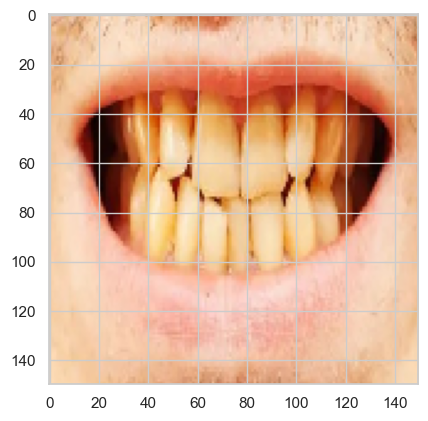

In [23]:
path = "discolor.jpg"
img = image.load_img(path, target_size=(150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
image_class = model.predict(images, batch_size=16)

print(path)

for i in range(len(classes)):
    # print(i)
    if image_class[0, i] > 0:
        print(f'{classes[i]} (Probability: {image_class[0, i]:.3f})')

if np.max(image_class) == 0:
    print('Not defined')